<a href="https://colab.research.google.com/github/helena0070406/Code/blob/main/Matrics_Haiwei_FU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coding by Haiwei FU

In [ ]:
# Import libraries, features and settings 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [ ]:
# improt database.
Candydata = pd.read_csv("candy-data.csv")
Candydata.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


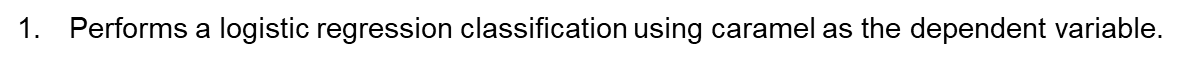

In [ ]:
# create datasat.
Carameldata = Candydata['caramel']
Carameldata.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: caramel, dtype: int64

In [ ]:
# see data type.
Carameldata.dtypes

dtype('int64')

In [ ]:
# Clean the missing values if needed
train_df = Carameldata.dropna()
train_df.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: caramel, dtype: int64

In [ ]:
# count data values.
train_df.value_counts()


0    71
1    14
Name: caramel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


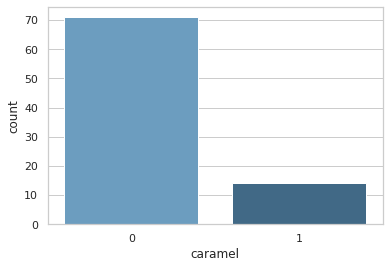

<Figure size 432x288 with 0 Axes>

In [ ]:
# visualization of the column.
sns.countplot("caramel", data=Candydata, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

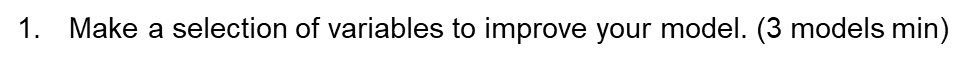

In [ ]:
# select columns to do own selection.
test_date = Candydata[['chocolate','caramel']]
test_date.head(10)

,chocolate,caramel
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,1
7,0,0
8,0,0
9,0,1


In [ ]:
x_test = Candydata['chocolate']
y_test = Candydata['caramel']
x_test.head(5)
y_test.head(5)

0    1
1    0
2    0
3    0
4    0
Name: caramel, dtype: int64

In [ ]:
# buld metrics. if have or not only chocolate or both.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(x_test, y_test)
cnf_matrix

array([[44,  4],
       [27, 10]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

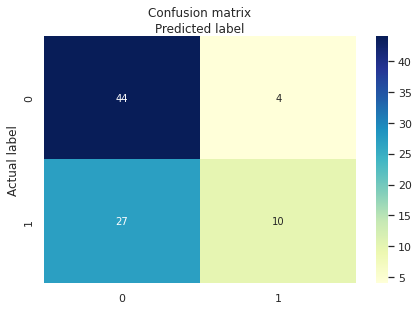

In [ ]:
# show the cluster visualization.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

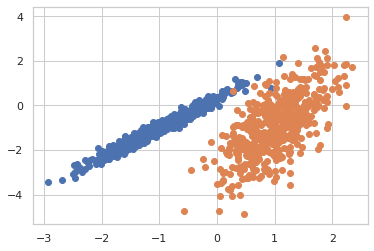

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot

In [ ]:
clf_log=LogisticRegression().fit(x_test, y_test)
y_pred=clf_log.predict(x_test)
print(y_pred)

ValueError: ignored

In [ ]:
# CFM evaluation metrics Accuracy, Precision, Recall
print("Accuracy:",metrics.accuracy_score(x_test, y_test))
print("Precision:",metrics.precision_score(x_test, y_test))
print("Recall:",metrics.recall_score(x_test, y_test))
print("F1_score:",metrics.recall_score(x_test, y_test))

Accuracy: 0.6352941176470588
Precision: 0.7142857142857143
Recall: 0.2702702702702703
F1_score: 0.2702702702702703


In [ ]:
multicolinearity_check = test_date.corr()
print(multicolinearity_check)

           chocolate   caramel
chocolate   1.000000  0.249875
caramel     0.249875  1.000000


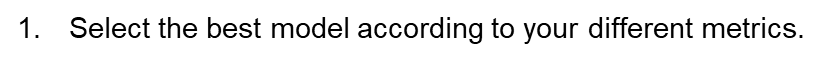

I would like to choose confusion matrix, this model.

In [ ]:
x_test = Candydata['chocolate']
y_test = Candydata['caramel']
x_test.head(5)
y_test.head(5)

0    1
1    0
2    0
3    0
4    0
Name: caramel, dtype: int64

In [ ]:
# buld metrics. if have or not only chocolate or both.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(x_test, y_test)
cnf_matrix

array([[44,  4],
       [27, 10]])

Text(0.5, 257.44, 'Predicted label')

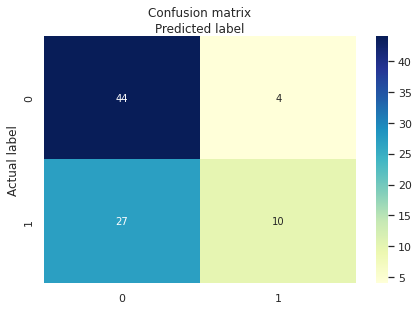

In [ ]:
# show the cluster visualization.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
clf_log=LogisticRegression().fit(x_test, y_test)
y_pred=clf_log.predict(x_test)
print(y_pred)

ValueError: ignored

In [ ]:
# CFM evaluation metrics Accuracy, Precision, Recall
print("Accuracy:",metrics.accuracy_score(x_test, y_test))
print("Precision:",metrics.precision_score(x_test, y_test))
print("Recall:",metrics.recall_score(x_test, y_test))
print("F1_score:",metrics.recall_score(x_test, y_test))

Accuracy: 0.6352941176470588
Precision: 0.7142857142857143
Recall: 0.2702702702702703
F1_score: 0.2702702702702703


In [ ]:
multicolinearity_check = test_date.corr()
print(multicolinearity_check)

           chocolate   caramel
chocolate   1.000000  0.249875
caramel     0.249875  1.000000
